In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# 1. Membaca dataset
df = pd.read_csv(r'C:\Users\OPTION\Downloads\Python DA\Projects 22_Gojek Appstore Sentiments Analysis (Upload Nanti)\AppStoreGojekReviews.csv', parse_dates=['date'])
df

,Unnamed: 0,date,review,rating,title
0,0,2017-09-11 12:10:00,Good,5,Awesome
1,1,2018-11-09 11:16:00,Kenapa tidak ada opsi login with email??? Tolo...,4,Login with Email
2,2,2019-05-18 09:11:00,"Beberapa minggu ini jadi sering force close, g...",1,Force close di iPhone 6 Low Power Mode
3,3,2020-01-11 05:56:00,"1. Go mart nya kok di hilangin kenapa sih, udh...",1,Gojek kamu telah berubah... :(
4,4,2019-12-24 03:36:00,"Promo di hp tiap ornag beda, ada yg ada promon...",1,Brenti mainin harga
...,...,...,...,...,...
1995,1995,2024-04-11 11:21:00,Kurang banyak discount,4,Discount
1996,1996,2024-04-11 06:44:00,"terimakasih ya, karna gojek, bisa ngebantu kal...",5,Nilai.
1997,1997,2024-04-11 10:13:00,"Driver telp lalu matikan, hacker di kembang bi...",1,"Driver nakal, charge parkir padahal gratis"
1998,1998,2024-04-11 05:05:00,⭐️⭐️⭐️⭐️⭐️,5,⭐️⭐️⭐️⭐️⭐️


In [8]:
# Menampilkan informasi dasar
print("Dimensi awal dataset:", df.shape)

Dimensi awal dataset: (2000, 5)


In [9]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  2000 non-null   int64         
 1   date        2000 non-null   datetime64[ns]
 2   review      2000 non-null   object        
 3   rating      2000 non-null   int64         
 4   title       2000 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 78.3+ KB


,Unnamed: 0,rating
count,2000.000000,2000.000000
mean,999.500000,3.375000
std,577.494589,1.834409
min,0.000000,1.000000
25%,499.750000,1.000000
50%,999.500000,5.000000
75%,1499.250000,5.000000
max,1999.000000,5.000000


In [10]:
# --- Tinjauan Data Sebelum Cleaning ---
print("Data Sebelum Cleaning")
print("Jumlah baris:", df.shape[0])
print("Jumlah duplikat:", df.duplicated().sum())
print("Missing values per kolom:\n", df.isnull().sum())

Data Sebelum Cleaning
Jumlah baris: 2000
Jumlah duplikat: 0
Missing values per kolom:
 Unnamed: 0    0
date          0
review        0
rating        0
title         0
dtype: int64


In [11]:
# --- Deteksi Outlier ---
# Misal: anggap rating harus berada pada rentang 1 sampai 5
outliers = df[(df['rating'] < 1) | (df['rating'] > 5)]
print("Jumlah outlier pada rating:", outliers.shape[0])

Jumlah outlier pada rating: 0


In [12]:
# --- Proses Data Cleaning ---
# Hapus duplikat
df_clean = df.drop_duplicates()
# Hapus baris yang memiliki missing values
df_clean = df_clean.dropna()
# Hapus outlier (rating di luar rentang 1-5)
df_clean = df_clean[(df_clean['rating'] >= 1) & (df_clean['rating'] <= 5)]

print("\nData Setelah Cleaning")
print("Jumlah baris:", df_clean.shape[0])
print("Jumlah duplikat:", df_clean.duplicated().sum())
print("Missing values per kolom:\n", df_clean.isnull().sum())


Data Setelah Cleaning
Jumlah baris: 2000
Jumlah duplikat: 0
Missing values per kolom:
 Unnamed: 0    0
date          0
review        0
rating        0
title         0
dtype: int64


In [13]:
# --- Visualisasi Data Sebelum/Setelah Cleaning (Histogram dan Box Plot) ---
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Histogram Rating (Setelah Cleaning)')

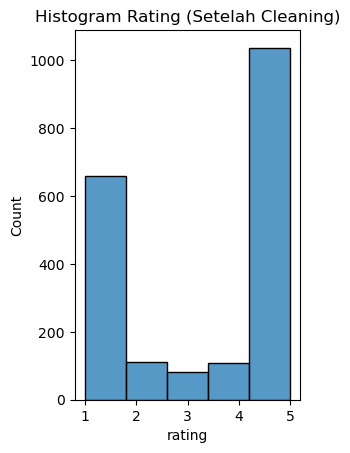

In [14]:
# Histogram rating
plt.subplot(1,2,1)
sns.histplot(df_clean['rating'], bins=5, kde=False)
plt.title('Histogram Rating (Setelah Cleaning)')

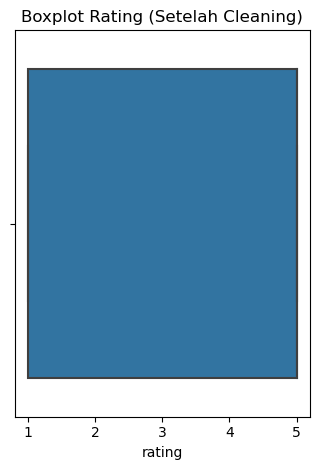

In [15]:
# Boxplot rating
plt.subplot(1,2,2)
sns.boxplot(x=df_clean['rating'])
plt.title('Boxplot Rating (Setelah Cleaning)')
plt.tight_layout()
plt.show()

In [16]:
# --- Perbandingan Jumlah Data ---
print("\nPerbandingan Jumlah Record:")
print("Sebelum Cleaning:", df.shape[0])
print("Setelah Cleaning:", df_clean.shape[0])

# --- Simpan dataset yang sudah dibersihkan ---
df_clean.to_csv('AppStoreGojekReviews-CLEANED.csv', index=False)


Perbandingan Jumlah Record:
Sebelum Cleaning: 2000
Setelah Cleaning: 2000


In [17]:
# Menghitung metrik dasar
total_reviews = df_clean.shape[0]
average_rating = df_clean['rating'].mean()

print("Total Reviews:", total_reviews)
print("Average Rating:", average_rating)

Total Reviews: 2000
Average Rating: 3.375


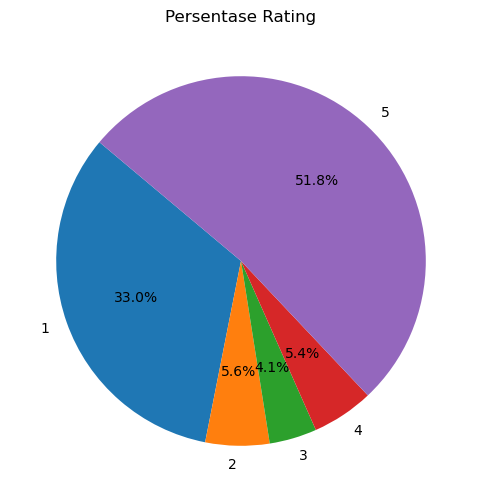

In [18]:
# --- Pie Chart: Persentase tiap Rating ---
rating_counts = df_clean['rating'].value_counts().sort_index()
plt.figure(figsize=(8,6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Rating')
plt.show()

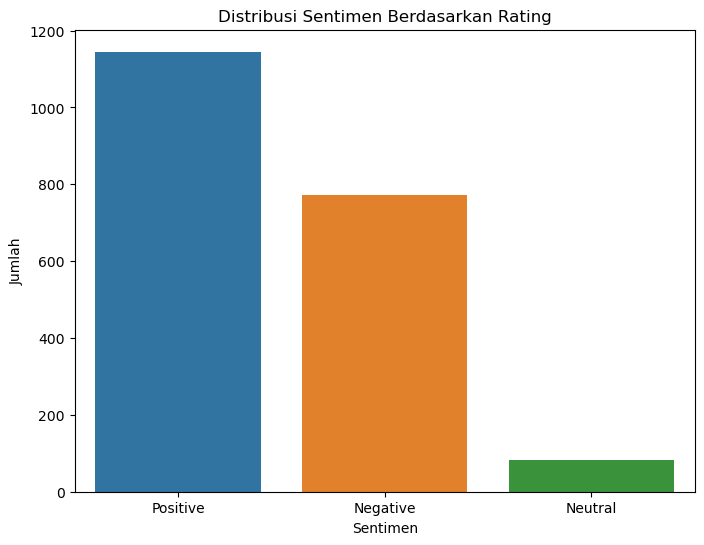

In [19]:
# --- Bar Chart: Distribusi Sentimen berdasarkan Rating ---
# Misal: rating 1-2 = Negative, rating 3 = Neutral, rating 4-5 = Positive
def sentiment(rating):
    if rating <= 2:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    else:
        return 'Positive'

df_clean['sentiment'] = df_clean['rating'].apply(sentiment)
sentiment_counts = df_clean['sentiment'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribusi Sentimen Berdasarkan Rating')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

In [21]:
# import dash
# from dash import dcc, html
# import plotly.express as px

# # Membuat figure menggunakan Plotly Express
# fig_hist = px.histogram(df_clean, x='rating', nbins=5, title='Histogram Rating')
# fig_box = px.box(df_clean, x='rating', title='Boxplot Rating')
# fig_pie = px.pie(values=rating_counts.values, names=rating_counts.index, title='Persentase Rating')
# fig_bar = px.bar(x=sentiment_counts.index, y=sentiment_counts.values,
#                  title='Distribusi Sentimen Berdasarkan Rating',
#                  labels={'x': 'Sentimen', 'y': 'Jumlah'})
# fig_line = px.line(x=reviews_per_date.index, y=reviews_per_date.values,
#                    title='Jumlah Review per Tanggal',
#                    labels={'x': 'Tanggal', 'y': 'Jumlah Review'})

# # Inisialisasi Dash app
# app = dash.Dash(__name__)

# app.layout = html.Div([
#     html.H1("Dashboard Analisis AppStore Gojek Reviews", style={'textAlign': 'center'}),
#     html.Div([
#         html.Div([dcc.Graph(figure=fig_hist)], style={'width': '48%', 'display': 'inline-block'}),
#         html.Div([dcc.Graph(figure=fig_box)], style={'width': '48%', 'display': 'inline-block'})
#     ]),
#     html.Div([
#         html.Div([dcc.Graph(figure=fig_pie)], style={'width': '48%', 'display': 'inline-block'}),
#         html.Div([dcc.Graph(figure=fig_bar)], style={'width': '48%', 'display': 'inline-block'})
#     ]),
#     html.Div([dcc.Graph(figure=fig_line)], style={'width': '100%', 'display': 'inline-block'}),
#     html.Div([
#         html.P(f"Total Reviews: {total_reviews}", style={'fontSize': '18px'}),
#         html.P(f"Average Rating: {average_rating:.2f}", style={'fontSize': '18px'})
#     ], style={'textAlign': 'center', 'marginTop': '20px'})
# ])

# if __name__ == '__main__':
#     app.run_server(debug=True)
